<b>XTern 2021_ Data Science

<b>Analysing Data patterns of FoodieX Application

<b>Importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

<b>Importing the dataframe

In [3]:
ds = pd.read_csv('2020-XTern-DS.csv')

<b>Data Cleaning:-

In [4]:
ds.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [4]:
ds.tail()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes
2018,ID_8403,39.460944,-85.484355,"Desserts, Beverages",$150.00,$50.00,4.1,271,172,45 minutes


<b> Checking the datatypes

In [5]:
ds.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost      object
Minimum_Order     object
Rating            object
Votes             object
Reviews           object
Cook_Time         object
dtype: object

<b>Removing the " - ", "NEW", "null" Values from the Data Frame first of all, so we can avoid the errors. 

In [5]:
ds['Rating'] = ds['Rating'].str.replace("NEW","0").str.replace("Opening Soon", "0").str.replace("-","0")
ds['Votes'] = ds['Votes'].str.replace("NEW","0").str.replace("-","0")
ds['Reviews'] = ds['Reviews'].str.replace("-","0")

In [6]:
food = ds['Cuisines'].str.split(",").tolist()
food_cuisine = []

for x in food:
  food_cuisine.append(list(map(str.strip,x)))

ds['Cuisines'] = food_cuisine
ds.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"[Fast Food, Rolls, Burger, Salad, Wraps]",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"[Ice Cream, Desserts]",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"[Italian, Street Food, Fast Food]",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"[Mughlai, North Indian, Chinese]",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"[Cafe, Beverages]",$20.00,$99.00,3.2,521,235,65 minutes


In [7]:
ds.isnull().sum()

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

<b> Finding :1 

<b> Analysing the pattern of Rating of restaurants

In [8]:
ds['Average_Cost'] = ds['Average_Cost'].apply(lambda x: x.replace('$', ''))
ds['Minimum_Order'] = ds['Minimum_Order'].apply(lambda x: x.replace('$', ''))

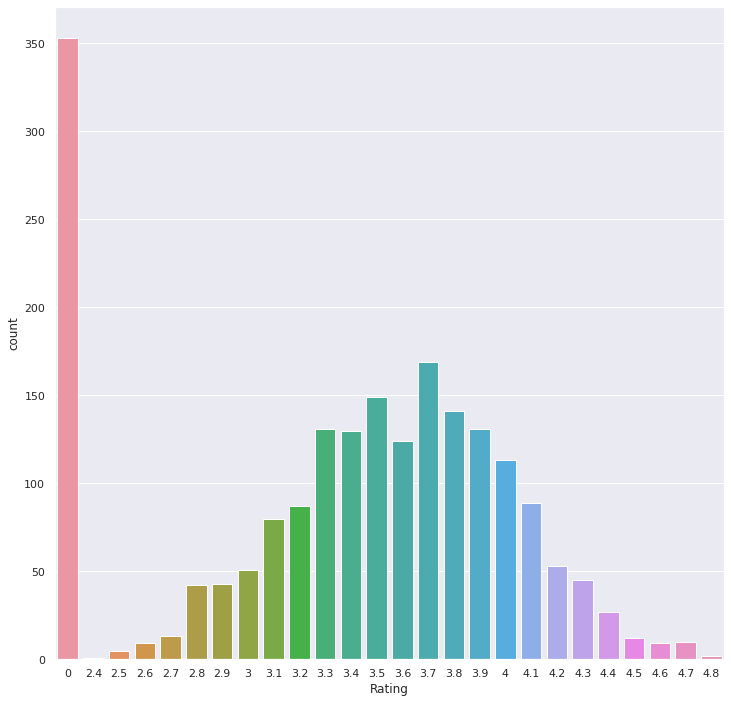

In [10]:
sns.set()
plt.figure(figsize=(12,12))
sns.countplot(x=ds['Rating'])
plt.show()

<b>Finding :2

<b>Analysing the pattern of cook_time required to prepare a food versus Ratings of a resturant.

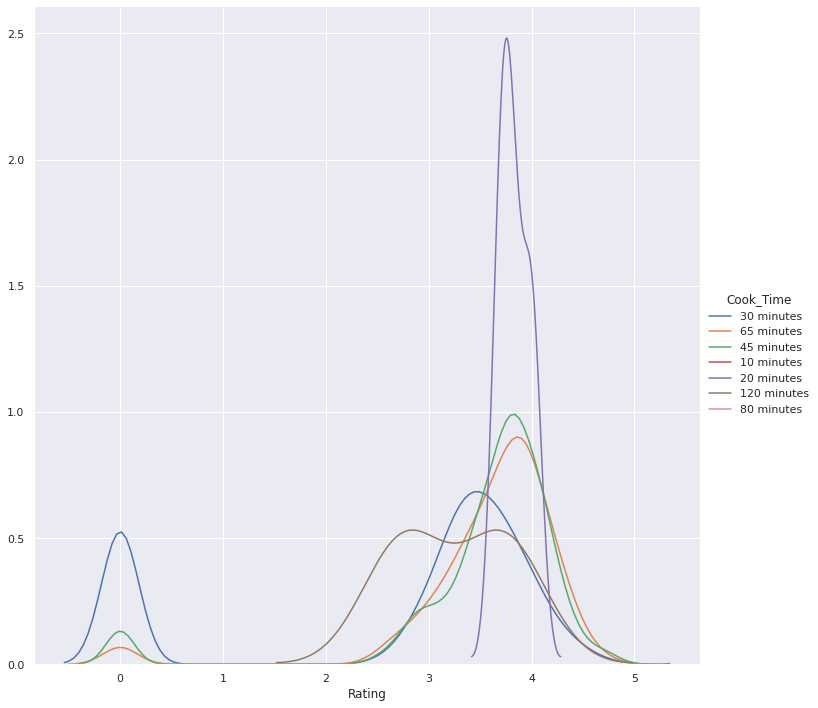

In [13]:
sns.FacetGrid(ds, hue="Cook_Time", size=10) \
   .map(sns.kdeplot, "Rating") \
   .add_legend()

<b>Finding:3

<b> Comparing and analysing the pattern of Ratings versus Minimum_Order

<AxesSubplot:xlabel='Rating', ylabel='Minimum_Order'>

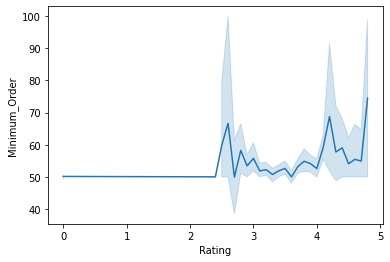

In [33]:
sns.lineplot(x=ds['Rating'], y=ds['Minimum_Order'])

<b>Finding:4

<b> Finding the Most 10 Favourite Restaurants using Votes and Rating given by public

In [41]:
d = ds.sort_values(["Rating", "Votes"], ascending = (False, False))
data= d[['Restaurant' ,'Rating', 'Votes']]
d= data[:10]
d

,Restaurant,Rating,Votes
1325,ID_4728,4.8,650
169,ID_7412,4.8,326
35,ID_1160,4.7,914
1180,ID_1064,4.7,9054
446,ID_1166,4.7,81
1949,ID_1166,4.7,81
325,ID_383,4.7,707
144,ID_6537,4.7,706
225,ID_6278,4.7,441
1428,ID_2051,4.7,3975


<b>Finding:3

<b> Analysing the Restaurant's pick up zone using Longitude and Latitude columns 

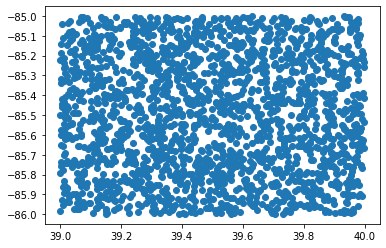

<Figure size 7200x7200 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=ds['Latitude'], y=ds['Longitude'])
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=20)
plt.figure(figsize=(100,100))
plt.show()

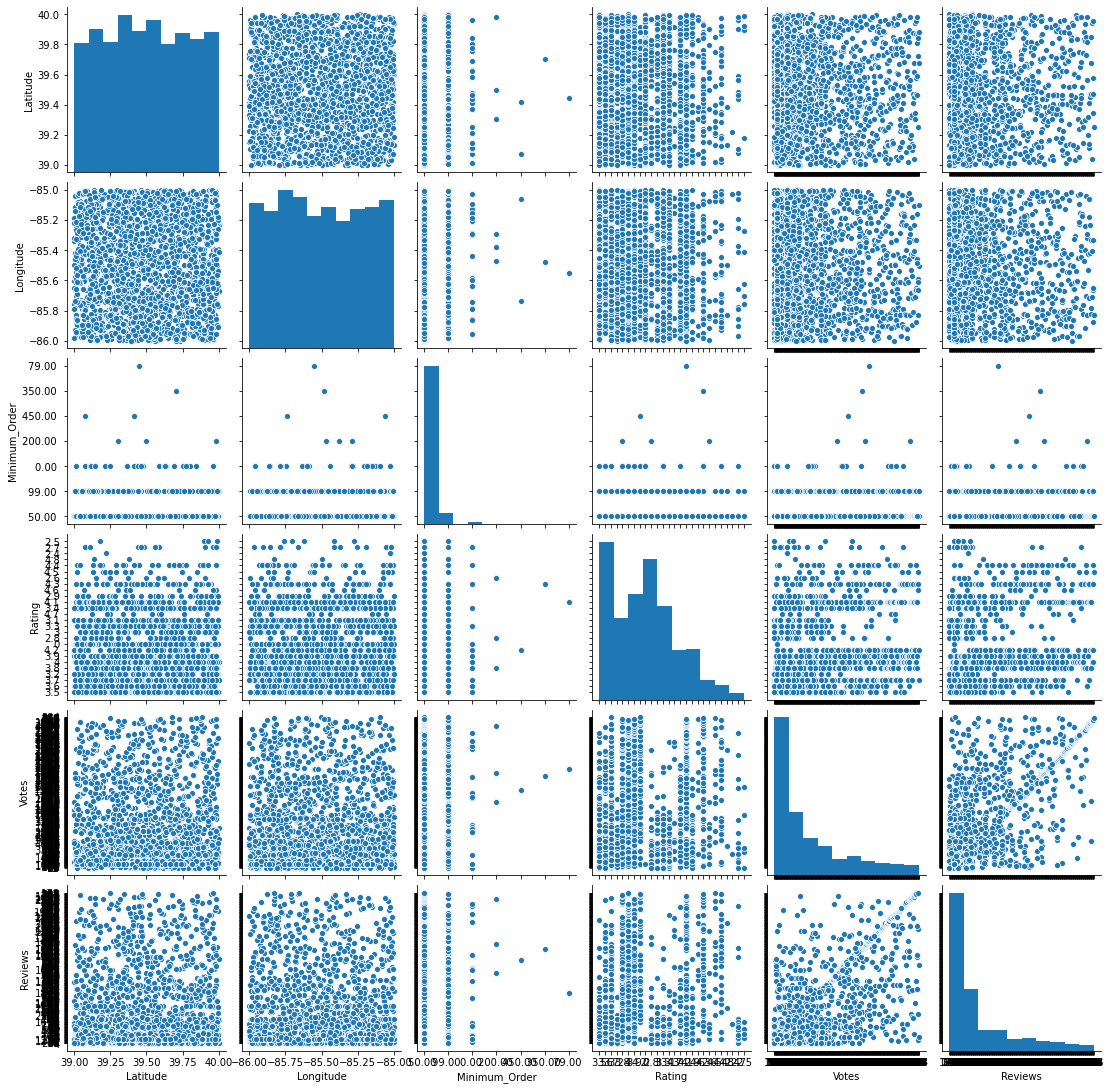

In [16]:
sns.pairplot(ds)